# Import Important Librarires

In [67]:
import pandas as pd
import os
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

# Test Connection to the PostgreSQL database server

In [68]:
def connect():
    """ Test Connection to the PostgreSQL database server """
    conn = None
    try:     
        conn = psycopg2.connect(
            host="database-1.cqfnswik0i0s.us-east-2.rds.amazonaws.com",
            database="DarwinTwo",
            user="gcpostgres",
            password="yb9GPoXzcdaLPFQO2ULv")
        
        # create a cursor
        cur = conn.cursor()
        
# execute a statement
        print('PostgreSQL database version:')
        cur.execute('SELECT version()')

# display the PostgreSQL database server version
        db_version = cur.fetchone()
        print(db_version)
# close the communication with the PostgreSQL
        cur.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')
connect()

PostgreSQL database version:
('PostgreSQL 15.3 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-12), 64-bit',)
Database connection closed.


# Get data from our PostgreSQL database server

In [69]:
def read_PGSQL():
    """ Get data from our PostgreSQL database server """
    conn = None
    try:     
        conn = psycopg2.connect(
            host="database-1.cqfnswik0i0s.us-east-2.rds.amazonaws.com",
            database="DarwinTwo",
            user="gcpostgres",
            password="yb9GPoXzcdaLPFQO2ULv")
              
#  query the database directly using pandas...
        df = pd.read_sql("SELECT * from darwin;", conn)
        
# close the communication with the PostgreSQL
        conn.close()
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()
            print('Database connection closed.')

    return df

In [70]:
# def read_parquet():
#     # Get the current working directory
#     current_dir = os.getcwd()
#     # Construct the local file path
#     csv_file_path = os.path.join(current_dir, 'Raildata-psqlcsv.csv')
#     print (csv_file_path)
#     # Read the CSV file into a DataFrame
#     df = pd.read_csv(csv_file_path)

#     # Display the DataFrame
#     return df

# Read Data from Database to Pandas DF

In [71]:
##########################################################################################
#  If reading from parquet get the datatframe kikle this
# df = read_parquet()

##########################################################################################
#  If reading from the the database do this...
df = read_PGSQL()

##########################################################################################
#  Show the result
df

/var/folders/62/7z5w_z35571_z71v3718p8lh0000gn/T/ipykernel_57525/1857211859.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * from darwin;", conn)


Database connection closed.


,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202308167142004,G42004,2023-08-16,TD,WELLING,None,21:20:30,21:21:00,21:21:00,21:21:00,...,1,NaN,None,None,None,None,False,False,None,None
1,202308168044880,P44880,2023-08-16,None,MANORS,None,21:20:30,21:21:00,21:21:00,21:21:00,...,None,2.0,None,None,None,None,False,False,None,None
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,3,4.0,None,None,None,None,False,False,None,None
3,202308167623593,L23593,2023-08-16,TD,CLPHMJM,None,21:20:00,21:21:00,21:20:00,21:21:00,...,11,NaN,None,None,None,None,False,False,None,None
4,202308168028082,P28082,2023-08-16,TD,SURREYQ,None,21:22:30,21:23:30,21:23:00,21:23:00,...,1,5.0,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30031,202308218726535,W26535,2023-08-21,TD,NWPTRTG,None,19:29:30,19:31:30,19:31:00,19:31:00,...,2,NaN,None,None,None,None,False,False,None,None
30032,202308218726535,W26535,2023-08-21,TD,CRDFCEN,None,19:44:00,19:47:00,19:45:00,19:47:00,...,3,NaN,None,None,None,None,False,False,None,None
30033,202308217635456,L35456,2023-08-21,TD,LVRPSPY,None,17:11:00,17:11:30,17:11:00,17:11:00,...,5,NaN,None,None,None,None,False,False,None,None
30034,202308218933367,Y33367,2023-08-21,Darwin,EDINPRK,None,17:11:00,17:11:30,17:11:00,17:11:00,...,1,NaN,None,None,None,None,False,False,None,None


# Data Cleaning and Understanding

In [72]:
df.dtypes

route_id                   object
unique_id                  object
service_start_date         object
update_origin              object
train_platform             object
working_time_pass          object
working_time_arrival       object
working_time_departure     object
planned_time_arrival       object
planned_time_departure     object
actual_arrival_time        object
actual_departure_time      object
platform                   object
train_length              float64
estimated_time             object
source                     object
actual_time                object
actual_time_class          object
is_delayed_arrival           bool
is_delayed_departure         bool
source_instance            object
estimated_time_minutes     object
dtype: object

# Updates on platform by update origin

# Business Case :Reasons for Delays and Recommendations for Better Customer Services  -Source for Data Analysis ?

# Data Cleaning and Preprocessing:

In [73]:
df['update_origin'].value_counts()  # Cheking DF update_origin col for unique values

TD             12674
Darwin          8941
CIS             5197
Trust           2583
Tyrell           123
Workstation       29
Name: update_origin, dtype: int64

In [74]:
df['update_origin'].isnull().count() # Cheking for null values in  DF update_origin col

30036

# # Group by 'update_origin' and count occurrences

In [75]:

new_df = df.copy()  # Make sure to copy the DataFrame to avoid modifying the original data
result = new_df.groupby('update_origin').size().reset_index(name='Record Count')

# Rename columns and set index to start from one
result.index = result.index + 1
result = result.rename(columns={'update_origin': 'Data Source'})

# Display the modified result
result


,Data Source,Record Count
1,CIS,5197
2,Darwin,8941
3,TD,12674
4,Trust,2583
5,Tyrell,123
6,Workstation,29


# Exploratory Data Analysis (EDA):

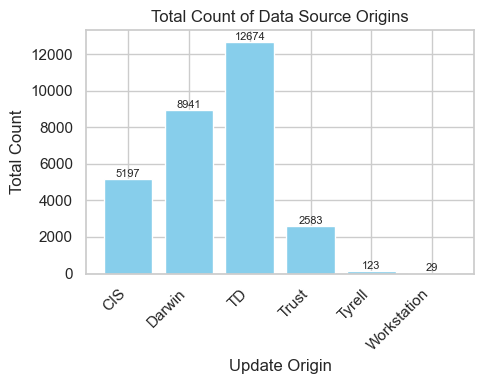

In [76]:
import matplotlib.pyplot as plt

# Group by 'update_origin' and count occurrences
result = df.groupby('update_origin').size().reset_index(name='total_count')

# Plot the data using a bar chart
plt.figure(figsize=(5, 4))  # Adjust the figsize here for a smaller graph
plt.bar(result['update_origin'], result['total_count'], color='skyblue')
plt.xlabel('Update Origin')
plt.ylabel('Total Count')
plt.title('Total Count of Data Source Origins')
plt.xticks(rotation=45, ha='right')

# Add labels to the bars
for i, count in enumerate(result['total_count']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Show the plot
plt.show()


## Clearly TD source system provides most of the rail information.

#  Business Case :Reasons for Delays and Recommendations for Better Customer Services -Arrival and Departure Delay Pattern

 Checking  arrival delay of top  50 stations.actual_arrival_time,planned_time_arrival,actual_departure_time,planned_time_departure

In [77]:
df.dtypes

route_id                   object
unique_id                  object
service_start_date         object
update_origin              object
train_platform             object
working_time_pass          object
working_time_arrival       object
working_time_departure     object
planned_time_arrival       object
planned_time_departure     object
actual_arrival_time        object
actual_departure_time      object
platform                   object
train_length              float64
estimated_time             object
source                     object
actual_time                object
actual_time_class          object
is_delayed_arrival           bool
is_delayed_departure         bool
source_instance            object
estimated_time_minutes     object
dtype: object

# Data Cleaning and Preprocessing:


# Find the null values in the columns 

In [78]:
null_trin_platform = df['train_platform'].isnull().sum()
null_counts_actual_arrival = df['actual_arrival_time'].isnull().sum()
null_counts_planned_arrival = df['planned_time_arrival'].isnull().sum()
null_counts_actual_departure = df['actual_departure_time'].isnull().sum()
null_counts_planned_departure = df['planned_time_departure'].isnull().sum()
null_counts_Isdelayed_arrival = df['is_delayed_arrival'].isnull().sum()
null_counts_Isdealyed_departure = df['is_delayed_departure'].isnull().sum()
print("Null Counts for trin_platform:", null_trin_platform)
print("Null Counts for actual_arrival_time:", null_counts_actual_arrival)
print("Null Counts for planned_time_arrival:", null_counts_planned_arrival)
print("Null Counts for actual_departure_time:", null_counts_actual_departure)
print("Null Counts for planned_time_departure:", null_counts_planned_departure)
print('Null Counts for Is_delayed_arrival:', null_counts_Isdelayed_arrival)
print('Null Counts for Is_delayed_departure:', null_counts_Isdelayed_arrival)



Null Counts for trin_platform: 0
Null Counts for actual_arrival_time: 5827
Null Counts for planned_time_arrival: 3368
Null Counts for actual_departure_time: 2860
Null Counts for planned_time_departure: 3635
Null Counts for Is_delayed_arrival: 0
Null Counts for Is_delayed_departure: 0


# Drop the rows where actual_arrival_time","planned_time_arrival","actual_departure_time","planned_time_departure"])
 has null values

In [79]:
df_without_nulls = df.dropna(subset=["actual_arrival_time","planned_time_arrival","actual_departure_time","planned_time_departure"])

# Display the new DataFrame without rows containing null or None values in "actual_arrival_time" column
df_without_nulls



,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,3,4.0,None,None,None,None,False,False,None,None
4,202308168028082,P28082,2023-08-16,TD,SURREYQ,None,21:22:30,21:23:30,21:23:00,21:23:00,...,1,5.0,None,None,None,None,False,False,None,None
6,202308168024331,P24331,2023-08-16,TD,FNCHLYR,None,21:21:30,21:22:00,21:22:00,21:22:00,...,2,5.0,None,None,None,None,False,False,None,None
7,202308168024331,P24331,2023-08-16,TD,HMPSTDH,None,21:24:00,21:24:30,21:24:00,21:24:00,...,2,5.0,None,None,None,None,False,False,None,None
8,202308168024331,P24331,2023-08-16,TD,GOSPLOK,None,21:26:30,21:27:30,21:27:00,21:27:00,...,2,5.0,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30030,202308218726535,W26535,2023-08-21,TD,CWMBRAN,None,19:17:30,19:19:30,19:18:00,19:19:00,...,1,NaN,None,None,None,None,False,False,None,None
30031,202308218726535,W26535,2023-08-21,TD,NWPTRTG,None,19:29:30,19:31:30,19:31:00,19:31:00,...,2,NaN,None,None,None,None,False,False,None,None
30032,202308218726535,W26535,2023-08-21,TD,CRDFCEN,None,19:44:00,19:47:00,19:45:00,19:47:00,...,3,NaN,None,None,None,None,False,False,None,None
30034,202308218933367,Y33367,2023-08-21,Darwin,EDINPRK,None,17:11:00,17:11:30,17:11:00,17:11:00,...,1,NaN,None,None,None,None,False,False,None,None


In [80]:
# Remove duplicates based on "train_platform" column
New_def_without_dup_null =df_without_nulls.copy()
New_def_without_dup_null = New_def_without_dup_null.drop_duplicates(subset=["train_platform"])

# Display the DataFrame with only unique "train_platform" values
New_def_without_dup_null

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,3,4.0,None,None,None,None,False,False,None,None
4,202308168028082,P28082,2023-08-16,TD,SURREYQ,None,21:22:30,21:23:30,21:23:00,21:23:00,...,1,5.0,None,None,None,None,False,False,None,None
6,202308168024331,P24331,2023-08-16,TD,FNCHLYR,None,21:21:30,21:22:00,21:22:00,21:22:00,...,2,5.0,None,None,None,None,False,False,None,None
7,202308168024331,P24331,2023-08-16,TD,HMPSTDH,None,21:24:00,21:24:30,21:24:00,21:24:00,...,2,5.0,None,None,None,None,False,False,None,None
8,202308168024331,P24331,2023-08-16,TD,GOSPLOK,None,21:26:30,21:27:30,21:27:00,21:27:00,...,2,5.0,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,202308218075992,P75992,2023-08-21,Trust,CULHAM,None,17:10:30,17:11:00,17:11:00,17:11:00,...,1,NaN,None,None,None,None,False,False,None,None
29987,202308218075992,P75992,2023-08-21,Trust,RDLEY,None,17:14:30,17:15:00,17:15:00,17:15:00,...,1,NaN,None,None,None,None,False,False,None,None
29990,202308218075992,P75992,2023-08-21,Trust,COMBE,None,17:35:30,17:36:00,17:36:00,17:36:00,...,1,NaN,None,None,None,None,False,False,None,None
29991,202308218075992,P75992,2023-08-21,Trust,FINSTCK,None,17:41:00,17:41:30,17:41:00,17:41:00,...,1,NaN,None,None,None,None,False,False,None,None


In [81]:


selected_columns = ["train_platform", "actual_arrival_time", "planned_time_arrival"]  # Columns to select
df_without_nulls1 = New_def_without_dup_null.copy()
Newdf = df_without_nulls1[selected_columns].copy()  # Create a copy of the selected columns
# New_def_arrival
# Set thereset the  index to start from 1
Newdf.reset_index(drop=True, inplace=True)
Newdf.index = Newdf.index + 1
# Display the modified DataFrame
Newdf


,train_platform,actual_arrival_time,planned_time_arrival
1,SVNOAKS,21:31:00,21:31:00
2,SURREYQ,21:23:00,21:23:00
3,FNCHLYR,21:22:00,21:22:00
4,HMPSTDH,21:24:00,21:24:00
5,GOSPLOK,21:27:00,21:27:00
...,...,...,...
2130,CULHAM,17:14:00,17:11:00
2131,RDLEY,17:18:00,17:15:00
2132,COMBE,17:38:00,17:36:00
2133,FINSTCK,17:43:00,17:41:00


In [82]:
# Check for Duplicates in NewDF
duplicates = Newdf["train_platform"].duplicated()
print(duplicates)

1       False
2       False
3       False
4       False
5       False
        ...  
2130    False
2131    False
2132    False
2133    False
2134    False
Name: train_platform, Length: 2134, dtype: bool


In [83]:
# # Remove duplicates based on "train_platform" column
New_def_arrival1 =Newdf.copy()
# New_def_arrival = New_def_arrival1.drop_duplicates(subset=["train_platform"])

# # Display the DataFrame with only unique "train_platform" values
# New_def_arrival


In [84]:
# # New_def_arrival.shape #Check for Number of Rows after dropping null values
New_def_arrival1.head(15)

,train_platform,actual_arrival_time,planned_time_arrival
1,SVNOAKS,21:31:00,21:31:00
2,SURREYQ,21:23:00,21:23:00
3,FNCHLYR,21:22:00,21:22:00
4,HMPSTDH,21:24:00,21:24:00
5,GOSPLOK,21:27:00,21:27:00
6,KNTSHTW,21:29:00,21:29:00
7,BURGESH,21:24:00,21:24:00
8,CONONLY,21:22:00,21:22:00
9,FORESTH,21:23:00,21:22:00
10,MNKRISB,01:28:00,01:28:00


In [85]:
# import matplotlib.pyplot as plt

# # Sort the DataFrame by arrival_delay in descending order
# sorted_arrival_data = Filter_def_arrival.sort_values(by='arrival_delay', ascending=False)

# # Plot a bar graph for arrival delays against train platforms
# plt.figure(figsize=(10, 6))
# plt.bar(sorted_arrival_data["train_platform"][:15], sorted_arrival_data["arrival_delay"][:15], color='blue')
# plt.xlabel("Train Platform")
# plt.ylabel("Arrival Delay (minutes)")
# plt.title("Arrival Delays for Different Train Platforms (Top 15)")
# plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels
# plt.tight_layout()

# # Display the bar graph
# plt.show()


In [86]:
from datetime import datetime, time, timedelta

New_def_arrival = New_def_arrival1.copy()

dummy_date = datetime(1900, 1, 1)

# Convert time columns to datetime objects with the dummy date
New_def_arrival["actual_arrival_time"] = New_def_arrival["actual_arrival_time"].apply(lambda x: datetime.combine(dummy_date, x))
New_def_arrival["planned_time_arrival"] = New_def_arrival["planned_time_arrival"].apply(lambda x: datetime.combine(dummy_date, x))

# Calculate the arrival delay in minutes using .loc
New_def_arrival.loc[:, "arrival_delay"] = (New_def_arrival["actual_arrival_time"] - New_def_arrival["planned_time_arrival"]).dt.total_seconds() / 60.0

# Remove the dummy date from the datetime columns using .loc
New_def_arrival.loc[:, "actual_arrival_time"] = New_def_arrival["actual_arrival_time"].dt.time
New_def_arrival.loc[:, "planned_time_arrival"] = New_def_arrival["planned_time_arrival"].dt.time

# Select specific columns
selected_columns = ["train_platform", "actual_arrival_time", "planned_time_arrival", "arrival_delay"]
Filter_def_arrival = New_def_arrival[selected_columns].copy()

# Filter out rows where "arrival_delay" is not null and not equal to 0.0
Filter_def_arrival = Filter_def_arrival[
    (Filter_def_arrival["arrival_delay"].notnull()) &
    (Filter_def_arrival["arrival_delay"] != 0.0) &
    (Filter_def_arrival["arrival_delay"] > 0.0)
]
# Set thereset the  index to start from 1
Filter_def_arrival.reset_index(drop=True, inplace=True)
Filter_def_arrival.index = Filter_def_arrival.index + 1

# Display the filtered DataFrame using pandas
print(Filter_def_arrival.head(15))



   train_platform actual_arrival_time planned_time_arrival  arrival_delay
1         FORESTH            21:23:00             21:22:00            1.0
2          TOTNES            21:19:00             21:13:00            6.0
3          PLYMTH            21:47:00             21:44:00            3.0
4            SASH            21:56:00             21:54:00            2.0
5         STGRMNS            22:03:00             22:01:00            2.0
6          THBDGS            00:24:00             00:23:00            1.0
7         CRAWLEY            00:28:00             00:27:00            1.0
8          IFIELD            00:31:00             00:30:00            1.0
9            LHVN            00:37:00             00:36:00            1.0
10        CUFFLEY            00:26:00             00:25:00            1.0
11        BAYFORD            00:30:00             00:29:00            1.0
12         SLOUGH            00:24:00             00:22:00            2.0
13        BATABAL            00:26:00 

   train_platform actual_arrival_time planned_time_arrival  arrival_delay
1         FORESTH            21:23:00             21:22:00            1.0
2          TOTNES            21:19:00             21:13:00            6.0
3          PLYMTH            21:47:00             21:44:00            3.0
4            SASH            21:56:00             21:54:00            2.0
5         STGRMNS            22:03:00             22:01:00            2.0
6          THBDGS            00:24:00             00:23:00            1.0
7         CRAWLEY            00:28:00             00:27:00            1.0
8          IFIELD            00:31:00             00:30:00            1.0
9            LHVN            00:37:00             00:36:00            1.0
10        CUFFLEY            00:26:00             00:25:00            1.0
11        BAYFORD            00:30:00             00:29:00            1.0
12         SLOUGH            00:24:00             00:22:00            2.0
13        BATABAL            00:26:00 

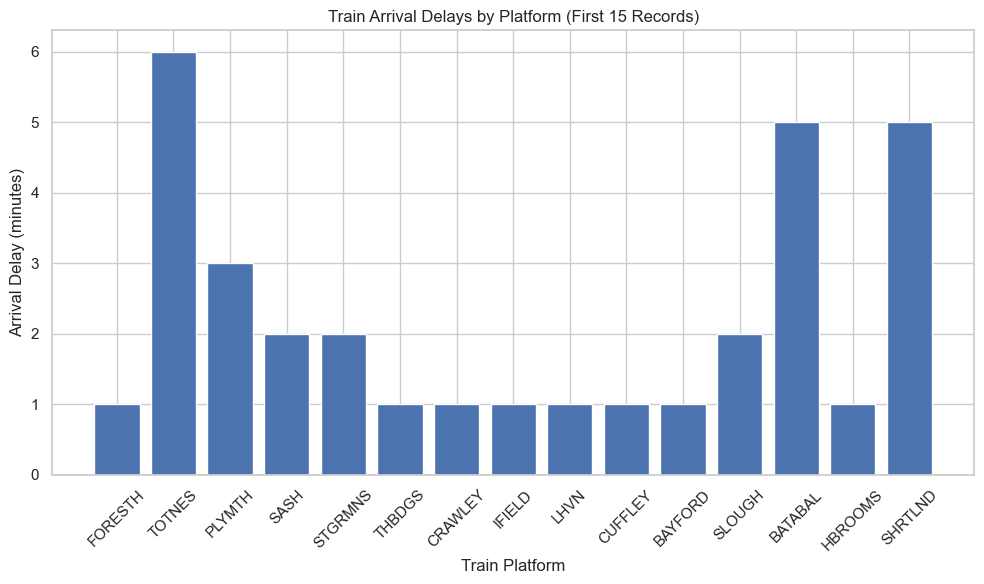

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code
# Sort the DataFrame by arrival_delay in descending order
sorted_df = Filter_def_arrival.sort_values(by="arrival_delay", ascending=True)
# Display the filtered DataFrame using pandas
print(Filter_def_arrival.head(15))

# Plotting the graph for the first 15 records
plt.figure(figsize=(10, 6))
plt.bar(Filter_def_arrival["train_platform"][:15], Filter_def_arrival["arrival_delay"][:15])
plt.xlabel("Train Platform")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Train Arrival Delays by Platform (First 15 Records)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


# Finding the Average Arrival Dealy

In [88]:
import pandas as pd

# Assuming your DataFrame is already loaded and named Filter_def_arrival

# Ensure "arrival_delay" is a numeric data type
Filter_def_arrival["arrival_delay"] = pd.to_numeric(Filter_def_arrival["arrival_delay"])

# Remove NaN or missing values, if any
Filter_def_arrival = Filter_def_arrival.dropna(subset=["arrival_delay"])

# Calculate the average arrival delay
average_arrival_delay = Filter_def_arrival["arrival_delay"].mean()

# Display the average arrival delay
print(f"Average Arrival Delay: {average_arrival_delay} minutes")


Average Arrival Delay: 8.514285714285714 minutes


In [89]:
# Create a copy of the DataFrame
# df_without_nulls_duplicates
New_def_departure1 = New_def_without_dup_null.copy()
New_def_departure1


,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,3,4.0,None,None,None,None,False,False,None,None
4,202308168028082,P28082,2023-08-16,TD,SURREYQ,None,21:22:30,21:23:30,21:23:00,21:23:00,...,1,5.0,None,None,None,None,False,False,None,None
6,202308168024331,P24331,2023-08-16,TD,FNCHLYR,None,21:21:30,21:22:00,21:22:00,21:22:00,...,2,5.0,None,None,None,None,False,False,None,None
7,202308168024331,P24331,2023-08-16,TD,HMPSTDH,None,21:24:00,21:24:30,21:24:00,21:24:00,...,2,5.0,None,None,None,None,False,False,None,None
8,202308168024331,P24331,2023-08-16,TD,GOSPLOK,None,21:26:30,21:27:30,21:27:00,21:27:00,...,2,5.0,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,202308218075992,P75992,2023-08-21,Trust,CULHAM,None,17:10:30,17:11:00,17:11:00,17:11:00,...,1,NaN,None,None,None,None,False,False,None,None
29987,202308218075992,P75992,2023-08-21,Trust,RDLEY,None,17:14:30,17:15:00,17:15:00,17:15:00,...,1,NaN,None,None,None,None,False,False,None,None
29990,202308218075992,P75992,2023-08-21,Trust,COMBE,None,17:35:30,17:36:00,17:36:00,17:36:00,...,1,NaN,None,None,None,None,False,False,None,None
29991,202308218075992,P75992,2023-08-21,Trust,FINSTCK,None,17:41:00,17:41:30,17:41:00,17:41:00,...,1,NaN,None,None,None,None,False,False,None,None


In [90]:
New_def_departure1

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,3,4.0,None,None,None,None,False,False,None,None
4,202308168028082,P28082,2023-08-16,TD,SURREYQ,None,21:22:30,21:23:30,21:23:00,21:23:00,...,1,5.0,None,None,None,None,False,False,None,None
6,202308168024331,P24331,2023-08-16,TD,FNCHLYR,None,21:21:30,21:22:00,21:22:00,21:22:00,...,2,5.0,None,None,None,None,False,False,None,None
7,202308168024331,P24331,2023-08-16,TD,HMPSTDH,None,21:24:00,21:24:30,21:24:00,21:24:00,...,2,5.0,None,None,None,None,False,False,None,None
8,202308168024331,P24331,2023-08-16,TD,GOSPLOK,None,21:26:30,21:27:30,21:27:00,21:27:00,...,2,5.0,None,None,None,None,False,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29986,202308218075992,P75992,2023-08-21,Trust,CULHAM,None,17:10:30,17:11:00,17:11:00,17:11:00,...,1,NaN,None,None,None,None,False,False,None,None
29987,202308218075992,P75992,2023-08-21,Trust,RDLEY,None,17:14:30,17:15:00,17:15:00,17:15:00,...,1,NaN,None,None,None,None,False,False,None,None
29990,202308218075992,P75992,2023-08-21,Trust,COMBE,None,17:35:30,17:36:00,17:36:00,17:36:00,...,1,NaN,None,None,None,None,False,False,None,None
29991,202308218075992,P75992,2023-08-21,Trust,FINSTCK,None,17:41:00,17:41:30,17:41:00,17:41:00,...,1,NaN,None,None,None,None,False,False,None,None


# Top15 Train with Departure Dealys 

In [91]:
# Create a copy of the DataFrame
# New_def_departure1 = New_def_departure.copy()

# Convert the time columns to datetime objects with a dummy date
dummy_date = datetime(1900, 1, 1)
New_def_departure1["actual_departure_time"] = New_def_departure1["actual_departure_time"].apply(lambda x: datetime.combine(dummy_date, x))
New_def_departure1["planned_time_departure"] = New_def_departure1["planned_time_departure"].apply(lambda x: datetime.combine(dummy_date, x))

# Calculate the departure delay in minutes
New_def_departure1["departure_delay"] = (New_def_departure1["actual_departure_time"] - New_def_departure1["planned_time_departure"]).dt.total_seconds() / 60.0

# Remove the dummy date from the datetime columns, keeping only the time portion
New_def_departure1["actual_departure_time"] = New_def_departure1["actual_departure_time"].dt.time
New_def_departure1["planned_time_departure"] = New_def_departure1["planned_time_departure"].dt.time

# Select specific columns "train_platform" and "departure_delay"
selected_columns = ["train_platform", "departure_delay"]
Filter_def_delay = New_def_departure1[selected_columns]

# Filter out rows where "departure_delay" is not null and not equal to 0.0
Filter_def_delay = Filter_def_delay[
    (Filter_def_delay["departure_delay"].notnull()) &
    (Filter_def_delay["departure_delay"] != 0.0)&
    (Filter_def_delay["departure_delay"] > 0.0)
]
# Set thereset the  index to start from 1
Filter_def_delay.reset_index(drop=True, inplace=True)
Filter_def_delay.index = Filter_def_delay.index + 1
# Display the filtered DataFrame using pandas
print(Filter_def_delay.head(15))


   train_platform  departure_delay
1         FORESTH              2.0
2          TOTNES              6.0
3          PLYMTH              2.0
4            SASH              2.0
5         STGRMNS              2.0
6         MENHENT              2.0
7         WANDCMN              1.0
8          BALHAM              1.0
9          THBDGS              1.0
10        CRAWLEY              1.0
11         IFIELD              1.0
12           LHVN              1.0
13        CUFFLEY              2.0
14        BAYFORD              2.0
15        BATABAL              6.0


   train_platform  departure_delay
1         FORESTH              2.0
2          TOTNES              6.0
3          PLYMTH              2.0
4            SASH              2.0
5         STGRMNS              2.0
6         MENHENT              2.0
7         WANDCMN              1.0
8          BALHAM              1.0
9          THBDGS              1.0
10        CRAWLEY              1.0
11         IFIELD              1.0
12           LHVN              1.0
13        CUFFLEY              2.0
14        BAYFORD              2.0
15        BATABAL              6.0


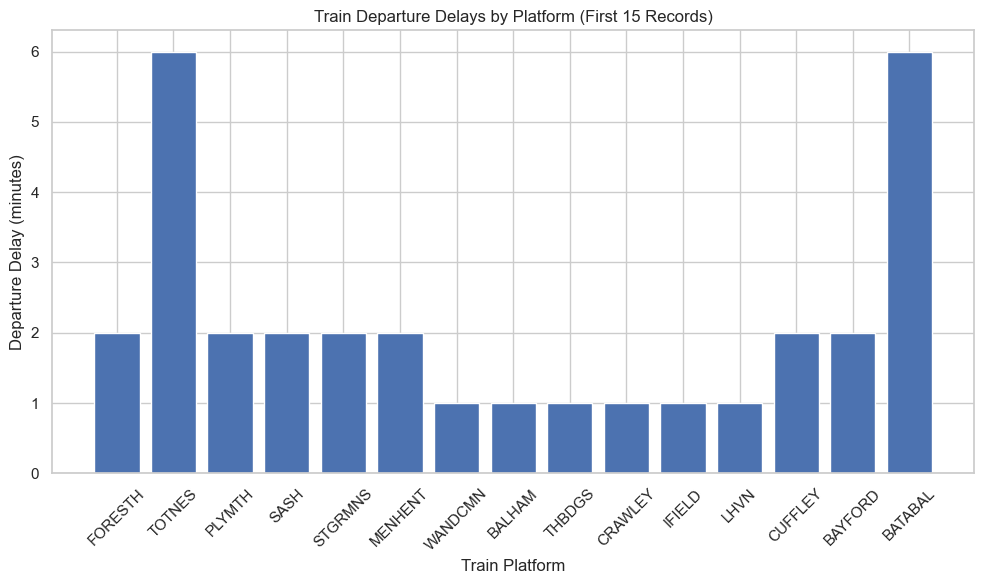

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Your existing code

# Display the filtered DataFrame using pandas
print(Filter_def_delay.head(15))

# Plotting the bar graph for the first 15 records
plt.figure(figsize=(10, 6))
plt.bar(Filter_def_delay["train_platform"][:15], Filter_def_delay["departure_delay"][:15])
plt.xlabel("Train Platform")
plt.ylabel("Departure Delay (minutes)")
plt.title("Train Departure Delays by Platform (First 15 Records)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


In [93]:
# Calculate the average arrival delay
average_departure_delay = Filter_def_delay["departure_delay"].mean()

# Display the average arrival delay
print(f"Average Departure Delay: {average_departure_delay} minutes")


Average Departure Delay: 7.787117903930131 minutes


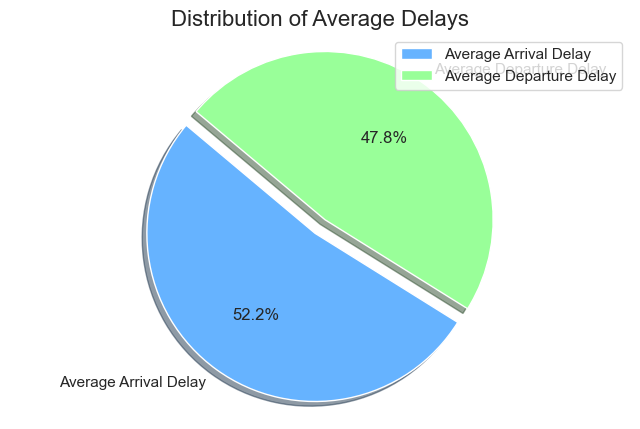

In [94]:
import matplotlib.pyplot as plt

# Data for the pie chart
average_delays = [average_arrival_delay, average_departure_delay]
delay_labels = ['Average Arrival Delay', 'Average Departure Delay']
colors = ['#66b3ff', '#99ff99']  # Custom colors for the slices

# Create a pie chart
plt.figure(figsize=(8, 5))
plt.pie(average_delays, labels=delay_labels, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True, explode=(0.05, 0.05))

# Title and styling
plt.title('Distribution of Average Delays', fontsize=16)
plt.axis('equal')
plt.legend(loc='upper right')

# Adjust label font size
plt.rcParams.update({'font.size': 12})

# Add a shadow effect and explode slices slightly

# Show the pie chart
plt.show()


In [95]:
# We have more Departure Delays 

# Business Case :Reasons for Delays and Recommendations for Better Customer Services -Train Length Pattern

# Top 20 Station where trains were never dealyed


In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame 'df' and preprocessing code
# ...

# Filter the DataFrame based on conditions
filtered_Arrival_df = df[
    (df['is_delayed_arrival'] == False) &
    (df['is_delayed_departure'] == False) &
    (df['train_length'].notnull()) &  # Filter non-null train lengths
    (df['train_platform'].notnull()) &
    (df['train_platform'].isin(df['train_platform'].unique()))
]

# Select unique train_platform values and create a new DataFrame
unique_Arrival_train_platforms_df = filtered_Arrival_df['train_platform'].drop_duplicates().reset_index(drop=True)

# Convert the Series to a DataFrame
unique_Arrival_train_platforms_df = unique_Arrival_train_platforms_df.to_frame(name='train_platform')

# Merge the 'train_length' column from the original DataFrame 'df' based on 'train_platform'
unique_Arrival_train_platforms_df = unique_Arrival_train_platforms_df.merge(
    df[['train_platform', 'train_length']].drop_duplicates(),
    on='train_platform',
    how='left'
)

# Reset the index and shift by 1
unique_Arrival_train_platforms_df.reset_index(drop=True, inplace=True)
unique_Arrival_train_platforms_df.index += 1  # Shift the index by 1

# Sort the DataFrame by 'train_length' in ascending order
non_null_records = unique_Arrival_train_platforms_df[unique_Arrival_train_platforms_df['train_length'].notnull()]
non_null_records = non_null_records.sort_values(by='train_length')

# Select top 15 records
top_15_records = non_null_records.head(20)

# # Plotting the graph for the top 20 train platforms and their train lengths
# plt.figure(figsize=(10, 6))
# plt.bar(top_15_records['train_platform'], top_15_records['train_length'])
# plt.xlabel('Train Platform')
# plt.ylabel('Train Length')
# plt.title('Top 20 Train Platforms and Their Train Lengths')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.tight_layout()

# plt.show()


In [106]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202308167142004,G42004,2023-08-16,TD,WELLING,None,21:20:30,21:21:00,21:21:00,21:21:00,...,1,NaN,None,None,None,None,False,False,None,None
1,202308168044880,P44880,2023-08-16,None,MANORS,None,21:20:30,21:21:00,21:21:00,21:21:00,...,None,2.0,None,None,None,None,False,False,None,None
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,3,4.0,None,None,None,None,False,False,None,None
3,202308167623593,L23593,2023-08-16,TD,CLPHMJM,None,21:20:00,21:21:00,21:20:00,21:21:00,...,11,NaN,None,None,None,None,False,False,None,None
4,202308168028082,P28082,2023-08-16,TD,SURREYQ,None,21:22:30,21:23:30,21:23:00,21:23:00,...,1,5.0,None,None,None,None,False,False,None,None


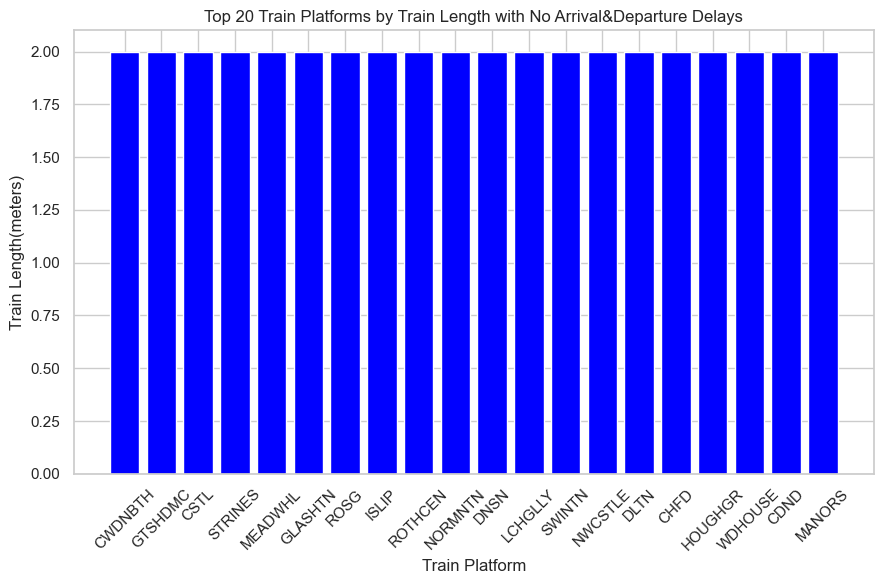

In [107]:
# Plot the graph for top 15 records
plt.figure(figsize=(9, 6))
plt.bar(top_15_records['train_platform'], top_15_records['train_length'], color='blue')
plt.xlabel('Train Platform')
plt.ylabel('Train Length(meters)')
plt.title('Top 20 Train Platforms by Train Length with No Arrival&Departure Delays')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.gca().invert_xaxis()  # Invert x-axis to have the highest platform on the left
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [108]:
import pandas as pd


# Filter the DataFrame based on conditions
filtered_Delay_df = df[
    (df['is_delayed_arrival'] == True) &
    (df['is_delayed_departure'] == True)
]

# Select unique train_platform values and create a new DataFrame
unique_Delay_train_platforms_df = filtered_Delay_df['train_platform'].drop_duplicates().reset_index(drop=True)

# Convert the Series to a DataFrame
unique_Delay_train_platforms_df = unique_Delay_train_platforms_df.to_frame(name='train_platform')

# Merge the 'train_length' column from the original DataFrame 'df' based on 'train_platform'
unique_Delay_train_platforms_df = unique_Delay_train_platforms_df.merge(
    df[['train_platform', 'train_length']].drop_duplicates(),
    on='train_platform',
    how='left'
)

# Drop duplicate rows based on the 'train_platform' column
unique_Delay_train_platforms_df = unique_Delay_train_platforms_df.drop_duplicates(subset=['train_platform'])

# Filter records with non-null train_length values
non_null_records = unique_Delay_train_platforms_df[unique_Delay_train_platforms_df['train_length'].notnull()]

# Sort the records by 'train_length' in descending order
non_null_records = non_null_records.sort_values(by='train_length', ascending=False)

# Select the top 10 records
top_10_records = non_null_records.iloc[:20]

# Display the top 10 records with delays and custom index
print("Table showing top 30 records with delays, ordered by train length:")
top_10_records.reset_index(drop=True, inplace=True)  # Resetting the index starting from 0
top_10_records.index += 1  # Shifting the index to start from 1
print(top_10_records)


Table showing top 30 records with delays, ordered by train length:
   train_platform  train_length
1            PRSP          12.0
2         ROYSTON          12.0
3         HASOCKS          12.0
4            GTWK          12.0
5          THBDGS          12.0
6         BALCOMB          12.0
7            LHVN          12.0
8            WSLE          12.0
9         HYWRDSH          12.0
10        THBDDTE          12.0
11         HRPNDN          12.0
12        WVLSFLD          12.0
13        SELLING          12.0
14        THBDUTE          12.0
15        BURGESH          12.0
16        TUNWELL          12.0
17           PLMS          10.0
18        WOLWCDY          10.0
19           WLOE          10.0
20        WOLWCHA          10.0


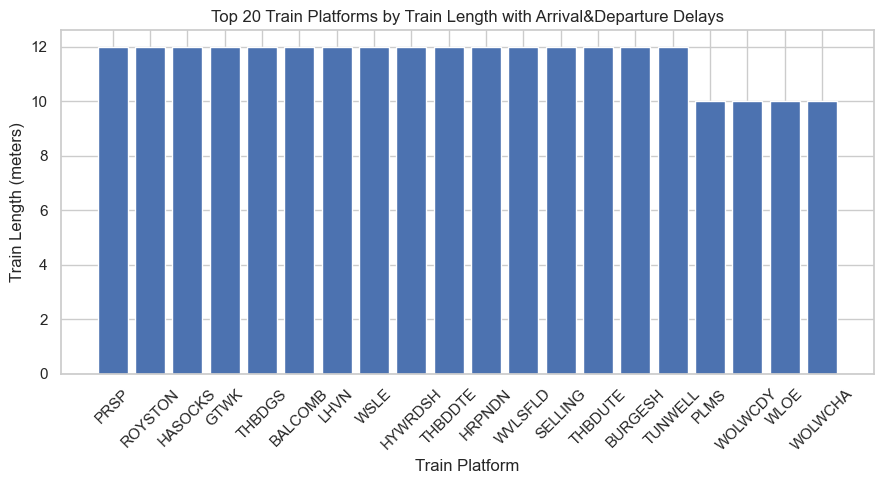

In [109]:
# Plot a bar graph for the top 10 records with delays
plt.figure(figsize=(9, 5))  # Adjust the figure size as needed
plt.bar(top_10_records['train_platform'], top_10_records['train_length'])
plt.xlabel('Train Platform')
plt.ylabel('Train Length (meters)')
plt.title('Top 20 Train Platforms by Train Length with Arrival&Departure Delays')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

#Understanding corrlation between catgorial data and numerical value.A box plot or a violin plot to visualize the distribution of train lengths for each train platform.



In [110]:
# filtered_df_no_delay = df[
#     (df['is_delayed_arrival'] == False) &
#     (df['is_delayed_departure'] == False) &
#     (df['train_length'].notnull())  # Filter non-null train lengths
# ]
# # Select the top 50 records
# top_50_records = filtered_df_no_delay.head(35)
# # Create a box plot for the top 50 records
# plt.figure(figsize=(8, 6))
# sns.boxplot(x=top_50_records["train_platform"], y=top_50_records["train_length"])
# plt.xlabel("Train Platform")
# plt.ylabel("Train Length")
# plt.title("Distribution of Train Lengths for Arrival and Departure Train Platforms with No Delays(Top 50 Records)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# # Display the plot
# plt.show()

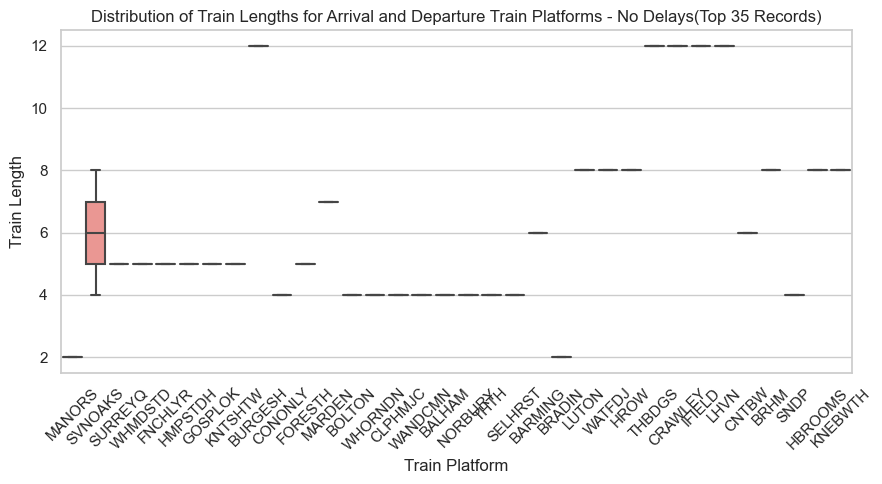

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your DataFrame 'df'

# Filter the DataFrame
filtered_df_no_delay = df[
    (df['is_delayed_arrival'] == False) &
    (df['is_delayed_departure'] == False) &
    (df['train_length'].notnull())&
    (df['train_platform'].notnull()) &
    (df['train_platform'].isin(df['train_platform'].unique()))
]

# Select the top 50 records
top_50_records = filtered_df_no_delay.head(35)  # You mentioned 35 in your original code, I changed it to 50

# Create a box plot for the top 50 records
plt.figure(figsize=(9, 5))
sns.boxplot(x=top_50_records["train_platform"], y=top_50_records["train_length"])
plt.xlabel("Train Platform")
plt.ylabel("Train Length")
plt.title("Distribution of Train Lengths for Arrival and Departure Train Platforms - No Delays(Top 35 Records)")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


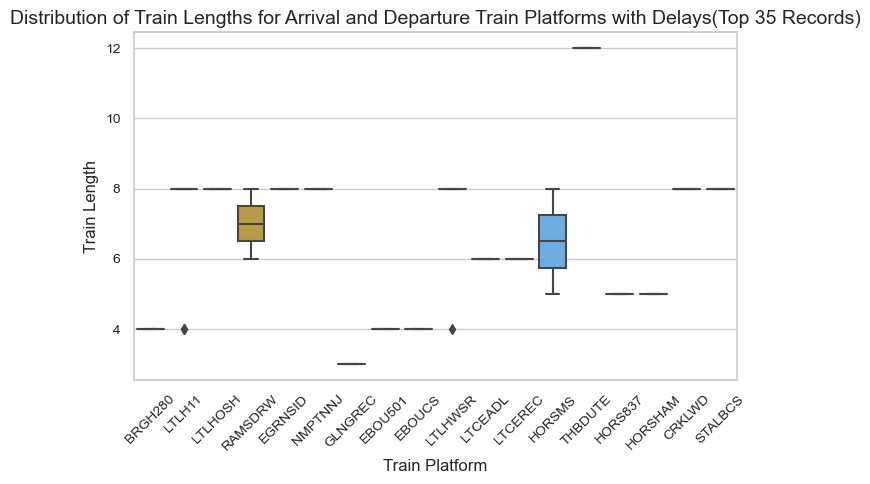

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame based on conditions with departure delays
filtered_df_delay = df[
    (df['is_delayed_arrival'] == True) &
    (df['is_delayed_departure'] == True) &
    (df['train_length'].notnull()) & # Filter non-null train lengths
    (df['train_platform'].notnull()) 
]

# Select the top 50 records
top_50_records = filtered_df_delay.head(50)

# Create a box plot
plt.figure(figsize=(7, 5))
sns.boxplot(x=top_50_records['train_platform'], y=top_50_records['train_length'])
plt.xlabel('Train Platform', fontsize=12)
plt.ylabel('Train Length', fontsize=12)
plt.title('Distribution of Train Lengths for Arrival and Departure Train Platforms with Delays(Top 35 Records)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


# Clearly Lenght of the train is contributing to an average delays in the platform, we can introduce same lenght(avg lenght of 10 ) train to avoid it.

# Finding if there is any particular day of the week or month when we have max delays?


In [38]:
df_day_month_dealy = df.copy()
df_day_month_dealy['service_start_date'].isnull().sum()

0

In [39]:


# Convert the 'service_start_date' column to datetime if it's not already
df_day_month_dealy['service_start_date'] = pd.to_datetime(df_day_month_dealy['service_start_date'])

# Extract full day name and month name into separate columns
df_day_month_dealy['day_of_week_name'] = df_day_month_dealy['service_start_date'].dt.strftime('%A')
df_day_month_dealy['month_name'] = df_day_month_dealy['service_start_date'].dt.strftime('%B')

# Print the DataFrame with the new day and month name columns
df_day_month_dealy.head(3)


,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes,day_of_week_name,month_name
0,202308167142004,G42004,2023-08-16,TD,WELLING,None,21:20:30,21:21:00,21:21:00,21:21:00,...,None,None,None,None,False,False,None,None,Wednesday,August
1,202308168044880,P44880,2023-08-16,None,MANORS,None,21:20:30,21:21:00,21:21:00,21:21:00,...,None,None,None,None,False,False,None,None,Wednesday,August
2,202308167195839,G95839,2023-08-16,TD,SVNOAKS,None,21:31:00,21:32:00,21:31:00,21:32:00,...,None,None,None,None,False,False,None,None,Wednesday,August


In [40]:

# Specify the columns to keep
cols_to_keep = ['day_of_week_name', 'month_name', 'train_platform', 'service_start_date', 'is_delayed_arrival', 'is_delayed_departure']

# Keep only the specified columns
df_day_month_dealy = df_day_month_dealy[cols_to_keep]
df_day_month_dealy = df_day_month_dealy.reset_index(drop=True)
df_day_month_dealy.index += 1 
df_day_month_dealy.head(20)

,day_of_week_name,month_name,train_platform,service_start_date,is_delayed_arrival,is_delayed_departure
1,Wednesday,August,WELLING,2023-08-16,False,False
2,Wednesday,August,MANORS,2023-08-16,False,False
3,Wednesday,August,SVNOAKS,2023-08-16,False,False
4,Wednesday,August,CLPHMJM,2023-08-16,False,False
5,Wednesday,August,SURREYQ,2023-08-16,False,False
6,Wednesday,August,WHMDSTD,2023-08-16,False,False
7,Wednesday,August,FNCHLYR,2023-08-16,False,False
8,Wednesday,August,HMPSTDH,2023-08-16,False,False
9,Wednesday,August,GOSPLOK,2023-08-16,False,False
10,Wednesday,August,KNTSHTW,2023-08-16,False,False


In [41]:

df_day_month_dealy = df.copy()

# Convert the 'service_start_date' column to datetime if it's not already
df_day_month_dealy['service_start_date'] = pd.to_datetime(df_day_month_dealy['service_start_date'])

# Extract full day name and month name into separate columns
df_day_month_dealy['day_of_week_name'] = df_day_month_dealy['service_start_date'].dt.strftime('%A')
df_day_month_dealy['month_name'] = df_day_month_dealy['service_start_date'].dt.strftime('%B')
# Specify the columns to keep
cols_to_keep = ['day_of_week_name', 'month_name', 'train_platform', 'service_start_date', 'is_delayed_arrival', 'is_delayed_departure']

# Keep only the specified columns
df_day_month_dealy = df_day_month_dealy[cols_to_keep]
df_day_month_dealy = df_day_month_dealy.reset_index(drop=True)
df_day_month_dealy.index += 1 

# Update the column names for printing
cols_to_print = ['Day', 'Month', 'Platform Name', 'Service Day', 'Arrival Delay', 'Departure Delay']

# Print the DataFrame with the updated column names for display
df_day_month_dealy.rename(columns=dict(zip(df_day_month_dealy.columns, cols_to_print))).head(15)


,Day,Month,Platform Name,Service Day,Arrival Delay,Departure Delay
1,Wednesday,August,WELLING,2023-08-16,False,False
2,Wednesday,August,MANORS,2023-08-16,False,False
3,Wednesday,August,SVNOAKS,2023-08-16,False,False
4,Wednesday,August,CLPHMJM,2023-08-16,False,False
5,Wednesday,August,SURREYQ,2023-08-16,False,False
6,Wednesday,August,WHMDSTD,2023-08-16,False,False
7,Wednesday,August,FNCHLYR,2023-08-16,False,False
8,Wednesday,August,HMPSTDH,2023-08-16,False,False
9,Wednesday,August,GOSPLOK,2023-08-16,False,False
10,Wednesday,August,KNTSHTW,2023-08-16,False,False


/var/folders/62/7z5w_z35571_z71v3718p8lh0000gn/T/ipykernel_2049/317700871.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('coolwarm', 2)


<Figure size 1200x600 with 0 Axes>

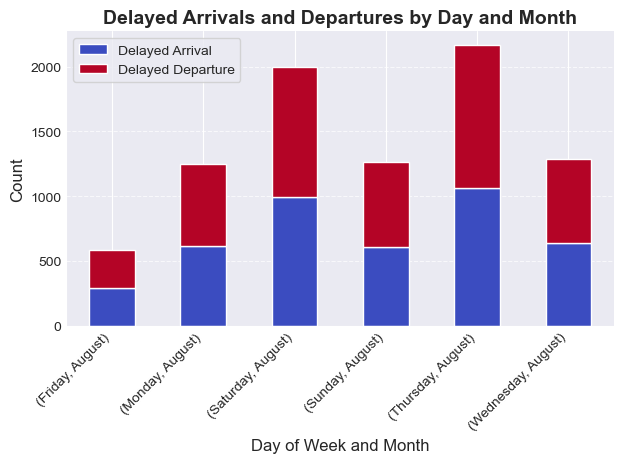

In [42]:
import matplotlib.pyplot as plt

# Calculate the counts of delayed arrivals and delayed departures
delayed_counts = df_day_month_dealy.groupby(['day_of_week_name', 'month_name'])[['is_delayed_arrival', 'is_delayed_departure']].sum()

# Set a custom color palette
color_palette = plt.cm.get_cmap('coolwarm', 2)

# Plot a stacked bar chart
plt.figure(figsize=(12, 6))
ax = delayed_counts.plot(kind='bar', stacked=True, colormap=color_palette)
plt.xlabel('Day of Week and Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Delayed Arrivals and Departures by Day and Month', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding horizontal grid lines
plt.legend(['Delayed Arrival', 'Delayed Departure'], fontsize=10, loc='upper left')  # Adjusted legend position
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)  # Removing tick marks

# Display the plot
plt.tight_layout()  # Ensuring all components fit within the fi

plt.show()


# It illustrates the distribution of delayed arrivals and delayed departures across different days of the week and months. Each bar on the chart represents a combination of a day of the week and a month.
The stacked bar chart shows a higher count of delays on Wednesdays and Thursdays in the month of August. This pattern could indicate that there's something specific about those days and that particular month that leads to more delays in train arrivals and departures.To gain a deeper understanding of the reasons behind this pattern we can consider looking into factors such as: Weather Conditions,Peak Travel Season,Maintenance and Repair,Operational Challenges and External Factors.Recommendations to provide best service to customers based on the above EDA would depend on the actual factors list above.